# Youtube

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

In [130]:
y_june = (
    pd.read_csv('DATA/youtubejune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "channel name": "username",
        "youTuber":"name",
        "Category": "category1",
        "Category_2": "category2",
        "Subscribers count": "subs",
        "Country": "country",
        "Views avg.": "views",
        "Likes avg": "likes",
        "Comments avg.": "comments",
        "Month": "month"
    })
    # .dropna()
)
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June


In [131]:
y_sep = (
    pd.read_csv('DATA/Youtubesep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Name": "username",
        "Youtuber":"name",
        "Category_2": "category2",
        " Subscribers": "subs",
        "Country": "country",
        "Avg. views\r\n": "views",
        "Avg. likes": "likes",
        "Avg Comments": "comments",
        "Category_3": "category3",
        "Month": "month"
    })
    .drop("S.no", axis=1)
    # .dropna()
)
y_sep.head(1)

,username,name,country,subs,category2,views,likes,comments,category3,month
0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September


In [132]:
y_nov = (
    pd.read_csv('DATA/youtubenov2022.csv')
    .assign(Month='November')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    # .dropna()
)
y_nov.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November


In [133]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = (
    pd.read_csv('DATA/YOUTUBEDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    # .dropna()
)
y_dec.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December


In [134]:
numeric_text_cols = ['subs', 'views', 'likes', 'comments']

def delete_rows_with_value(df, value):
    df.replace(value, np.nan, inplace=True)
    return df

y_june = delete_rows_with_value(y_june, "N/A'")
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,NaN,NaN,June


In [135]:
def cientific_int(column: pd.Series) -> pd.Series:
    return (
        column
        .fillna('0')
        .replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True)
        .map(pd.eval)
        .astype(int)
        .replace(0, np.nan)
    )

y_june.loc[:, numeric_text_cols] = y_june[numeric_text_cols].apply(cientific_int)
y_sep.loc[:, numeric_text_cols] = y_sep[numeric_text_cols].apply(cientific_int)
y_nov.loc[:, numeric_text_cols] = y_nov[numeric_text_cols].apply(cientific_int)
y_dec.loc[:, numeric_text_cols] = y_dec[numeric_text_cols].apply(cientific_int)

In [136]:
y_months = (
    pd.concat([y_june, y_sep, y_nov, y_dec], ignore_index=True)
    .drop_duplicates()
)

y_months

,username,name,category1,category2,subs,country,views,likes,comments,month,category3
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30500000.0,-,NaN,NaN,NaN,June,NaN
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10600000.0,-,348.0,3.0,NaN,June,NaN
2,shfa show India,shfa show India,Daily vlogs,NaN,18900000.0,-,1200000.0,8700.0,NaN,June,NaN
3,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15700000.0,-,1200000.0,4200.0,NaN,June,NaN
4,infobellstamil,infobells - Tamil,Education,NaN,26500000.0,-,1300000.0,5800.0,NaN,June,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4063,SULE PRODUCTIONS,SULE PRODUCTIONS,NaN,NaN,10100000.0,Indonesia,101500.0,2500.0,292.0,December,NaN
4064,Dynamo Gaming,Dynamo Gaming,NaN,NaN,10100000.0,India,112400.0,17800.0,677.0,December,NaN
4065,one_Iraqi_Diary,يوميات واحد عراقي | One Iraqi Diary,NaN,NaN,10100000.0,Iraq,2900000.0,245500.0,17200.0,December,NaN
4066,ClassicMrBean,Classic Mr Bean,NaN,NaN,10100000.0,India,48300.0,624.0,23.0,December,NaN


# Análisis

## 1. Número total de cuentas distintas

In [137]:
y_months.username.drop_duplicates().size

1729

## 2. Promedio de seguidores, views, likes y comments

In [138]:
y_means = (
    y_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'subs': 'mean',
        'views': 'mean',
        'likes': 'mean',
        'comments': 'mean'
    })    
    .reset_index()
)
y_means

,username,subs,views,likes,comments
0,#Refugio Mental,1.415000e+07,376650.000000,4725.000000,66.000000
1,#Refúgio Mental,1.277500e+07,205900.000000,6425.000000,59.500000
2,0214mex,1.036667e+07,828133.333333,22633.333333,1200.000000
3,1032010814,1.260000e+07,54533.333333,1600.000000,119.666667
4,123 GO!,1.177500e+07,355825.000000,2875.000000,86.750000
...,...,...,...,...,...
1724,서은이야기[SeoeunStory],9.400000e+06,77300.000000,443.000000,NaN
1725,서은일상이야기,1.030000e+07,14933.333333,104.333333,NaN
1726,설기양SULGI,1.057500e+07,748500.000000,17975.000000,556.250000
1727,웃웃TwinsFromRussia,1.180000e+07,107900.000000,5200.000000,22.000000


In [139]:
y_means

,username,subs,views,likes,comments
0,#Refugio Mental,1.415000e+07,376650.000000,4725.000000,66.000000
1,#Refúgio Mental,1.277500e+07,205900.000000,6425.000000,59.500000
2,0214mex,1.036667e+07,828133.333333,22633.333333,1200.000000
3,1032010814,1.260000e+07,54533.333333,1600.000000,119.666667
4,123 GO!,1.177500e+07,355825.000000,2875.000000,86.750000
...,...,...,...,...,...
1724,서은이야기[SeoeunStory],9.400000e+06,77300.000000,443.000000,NaN
1725,서은일상이야기,1.030000e+07,14933.333333,104.333333,NaN
1726,설기양SULGI,1.057500e+07,748500.000000,17975.000000,556.250000
1727,웃웃TwinsFromRussia,1.180000e+07,107900.000000,5200.000000,22.000000


## 3. Métricas de valor de cada cuenta

### Métricas de valor

In [140]:
y_means['views_ratio'] = y_means.views / y_means.subs
y_means['likes_ratio'] = y_means.likes / y_means.subs
y_means['comments_ratio'] = y_means.comments / y_means.subs

In [141]:
y_means

,username,subs,views,likes,comments,views_ratio,likes_ratio,comments_ratio
0,#Refugio Mental,1.415000e+07,376650.000000,4725.000000,66.000000,0.026618,0.000334,0.000005
1,#Refúgio Mental,1.277500e+07,205900.000000,6425.000000,59.500000,0.016117,0.000503,0.000005
2,0214mex,1.036667e+07,828133.333333,22633.333333,1200.000000,0.079884,0.002183,0.000116
3,1032010814,1.260000e+07,54533.333333,1600.000000,119.666667,0.004328,0.000127,0.000009
4,123 GO!,1.177500e+07,355825.000000,2875.000000,86.750000,0.030219,0.000244,0.000007
...,...,...,...,...,...,...,...,...
1724,서은이야기[SeoeunStory],9.400000e+06,77300.000000,443.000000,NaN,0.008223,0.000047,NaN
1725,서은일상이야기,1.030000e+07,14933.333333,104.333333,NaN,0.001450,0.000010,NaN
1726,설기양SULGI,1.057500e+07,748500.000000,17975.000000,556.250000,0.070780,0.001700,0.000053
1727,웃웃TwinsFromRussia,1.180000e+07,107900.000000,5200.000000,22.000000,0.009144,0.000441,0.000002


## 4. Histograma del número de cuentas que inicien por cada letra del alfabeto

### Gráficas

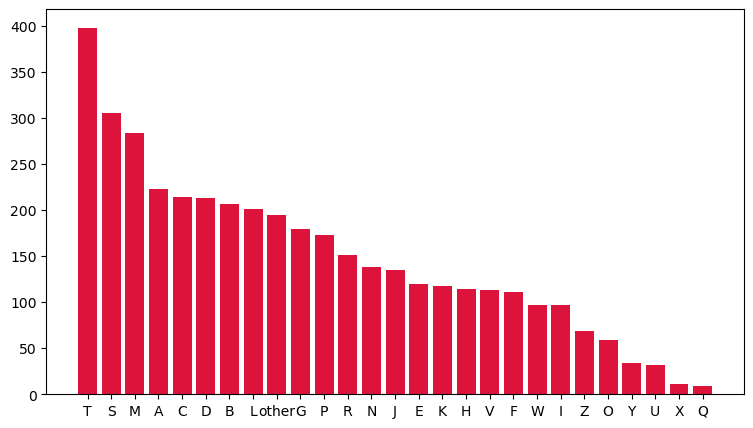

In [142]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'

initials = (
    y_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.figure(figsize=(9, 5)) 
plt.bar(initials.letter, initials.frequency, color = 'crimson')
plt.show()

## 5. Cuántas cuentas tienen ya sea en su username o name las letras de las iniciales de cada uno de lo sintegrantes?

In [143]:
(y_months.name.str.contains(r'[GgIiMm]') | y_months.name.str.contains(r'[GgIiMm]')).sum()

3139

## 6. Defina una métrica que identifique las 10 cuentas más importantes de youtube

In [144]:
y_means.head(0)

,username,subs,views,likes,comments,views_ratio,likes_ratio,comments_ratio


In [145]:
y_means = (
    y_means
    .assign(
        gen_engagement = (
            (
                (y_means.comments / y_means.views)
                * (y_means.views / y_means.subs)

                + (y_means.likes / y_means.views)
                * (y_means.views / y_means.subs)
            )
            * (
                (y_means.subs / max(y_months.subs))
            )
        )
    )
    .sort_values(['gen_engagement'], ascending=False)
)
y_means[['username', 'gen_engagement']].head(10)

,username,gen_engagement
192,CarryMinati,0.019917
770,MrBeast6000,0.015726
982,Round2hell,0.014582
1604,shakiraVEVO,0.014155
47,AddictedA1,0.012244
766,MrBeast,0.011483
149,Bizarrap,0.008941
768,MrBeast Shorts,0.007872
573,KAROL G,0.007827
126,Bad Bunny,0.007662


## 7. Grafique un histograma del número de seguidores por país

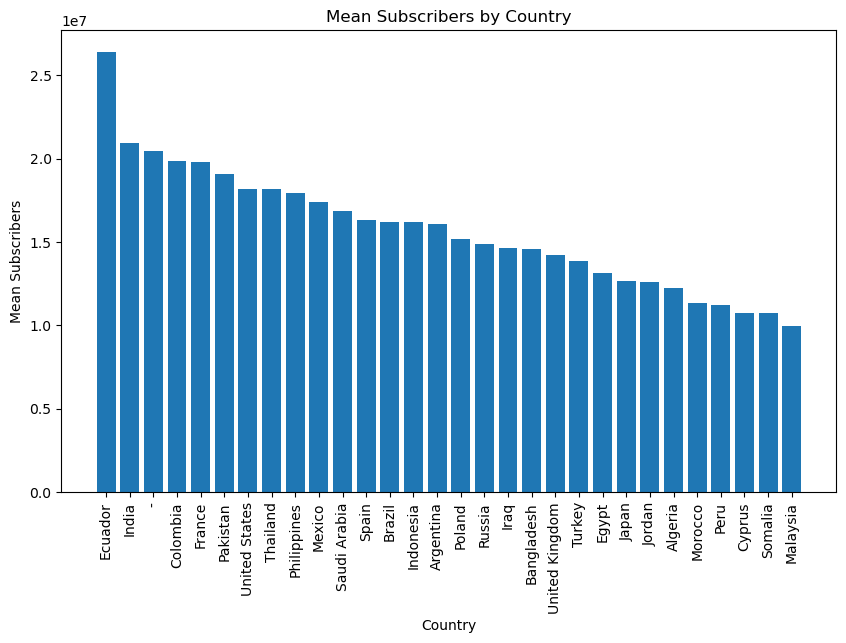

In [146]:
# print("y_means columns:", y_means.columns)
# print("y_months columns:", y_months.columns)

y_country_means = (
    y_means
    .merge(y_months, on='username', how='left')
)

# print("After merge columns:", y_country_means.columns)

y_country_means = y_country_means[['username', 'country', 'subs_x']].groupby('country').aggregate({'subs_x': 'mean'}).reset_index()

# print("After groupby and aggregate columns:", y_country_means.columns)

y_country_means = y_country_means.rename(columns={'subs_x': 'mean_subs'}).sort_values('mean_subs', ascending=False)

# print("After rename and sort_values columns:", y_country_means.columns)

# Set the figure size
plt.figure(figsize=(10, 6))

plt.bar(y_country_means['country'], y_country_means['mean_subs'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Country')
plt.ylabel('Mean Subscribers')
plt.title('Mean Subscribers by Country')

plt.show()

## 8. Crea una serie con todas las categorías existentes en todos los archivos de youtube

In [147]:
y_categories = (y_months.category1 + y_months.category2).dropna().drop_duplicates().reset_index(name='category')
y_categories = list(y_categories.category)

In [148]:
category_re = r'[A-Z][a-z\s]+[a-z]$'
res = set()
for element in y_categories:
    has_categories = re.findall(category_re, str(element))
    if has_categories:
        res = res.union(set(has_categories))

y_categories = pd.Series(list(res))
y_categories

0       Education
1         Fashion
2        Politics
3     Video games
4            Toys
5          Beauty
6      Technology
7          Movies
8          Drinks
9            Help
10        Mystery
11      Animation
12       Vehicles
13          Hacks
14        Fitness
15          Humor
dtype: object

## 9. Crea una serie con todos los países existente en todos los archivos de youtube

In [149]:
all_countries = y_months.country.dropna().drop_duplicates()
all_countries

0                    -
184            Algeria
188          Argentina
194         Bangladesh
197             Brazil
280           Colombia
291             Cyprus
292            Ecuador
293              Egypt
300             France
303              India
516          Indonesia
562               Iraq
572              Japan
575           Malaysia
576             Mexico
643            Morocco
646           Pakistan
653               Peru
654        Philippines
668             Poland
669             Russia
697       Saudi Arabia
701              Spain
706           Thailand
726             Turkey
729     United Kingdom
735      United States
1673            Jordan
1906           Somalia
Name: country, dtype: object

## 10. Grafique en un histograma el número de seguidores por categoría

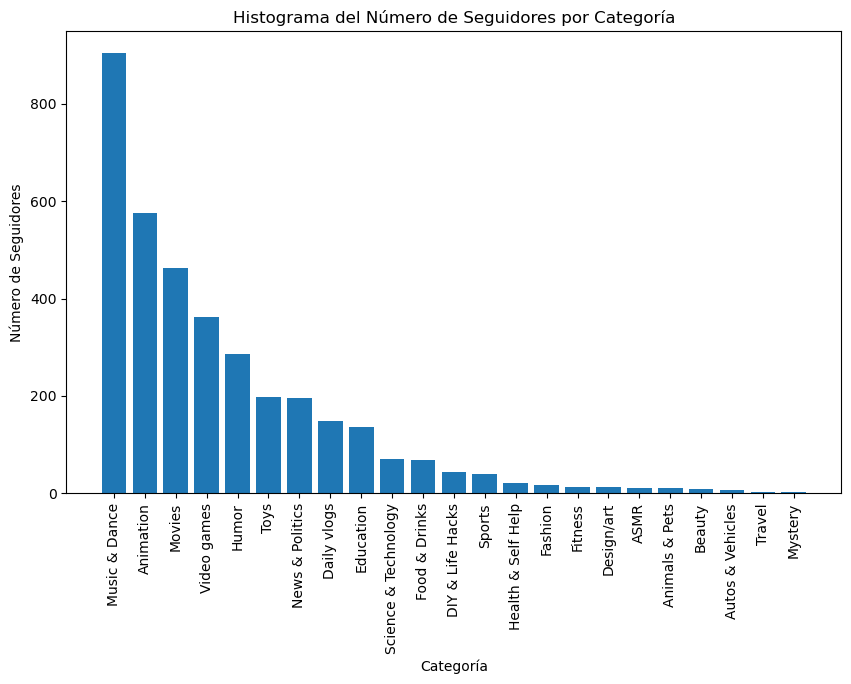

In [150]:
# Combina las dos columnas de categorías en una sola columna
combined_categories = pd.concat([y_months['category1'], y_months['category2']])

# Obtiene el recuento de cada categoría combinada
category_counts = combined_categories.value_counts()

# Crea el histograma
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)

# Personaliza el gráfico
plt.xlabel('Categoría')
plt.ylabel('Número de Seguidores')
plt.title('Histograma del Número de Seguidores por Categoría')

# Ajusta la rotación de las etiquetas del eje x si es necesario
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()